# Assignment 1: Bloated real-estate market!

## Instructions to submit the assignment

- Rename your jupyter notebook as `Assignment1_[StudentID].ipynb`.
- Your solution notebook must contain the python code that we can run to verify the answers.
- Upload your jupyter notebook on LumiNUS in the *Assignment 1 Submissions* folder. **The folder will close at 23:59 on 18/02/2021**. 
- Late submissions will receive a penalty on the grade as follows:
  - late within 1 hour: 10% reduction in grade
  - late within 6 hours: 30% reduction in grade
  - late within 12 hours: 50% reduction in grade
  - late within 1 day: 70% reduction in grade
  - after 1 day: zero mark

**This is an INDIVIDUAL ASSESSMENT. You must refrain from working in groups!**

## Question 1: Loading the data

With more than 1 million flats spread across 24 towns and 3 estates, the Singapore brand of public housing is uniquely different. The flats spell home for over 80% of Singapore's resident population, of which, about 90% own their home. 

Data.gov is a repository of many datasets that are made available by different public service bodies in Singapore. In this assignment we will work on [HDB Resale Price](https://data.gov.sg/dataset/resale-flat-prices) available through the same datastore. It houses the resale price data from January 1990 to December 2020 on a monthly basis. We will be working on the resale records from 2000 to 2020.

Let's start exploring this dataset.

We have downloaded the dataset for you. It is available in *Assignment_1* under files in the LumiNUS. Uncompress the file in your working directory. You will see that it comprises of multiple CSV files. Please perform following tasks:

- Create a single dataframe in `pandas` by reading and appending all CSV files that have names `resale*`. 
- Print the total number of HDB resales records.

<div align="right"> (1 point) </div>

In [83]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [84]:
import os
import glob
path = os.getcwd()
all_files = glob.glob(path + "/HDB/resale*")
df = pd.concat(pd.read_csv(f) for f in all_files)
len(df)

578144

## Question 2: Data Imputation

Print the count of missing values in every column of the dataframe.
<div align="right"> (1 point) </div>

In [85]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        421854
dtype: int64

We observe that the `remaining_lease` feature has multiple missing values. Impute the missing values and ensure that the dataframe does not contain any missing value.

*Hint: What is the lease period of every HDB flat in Singapore? [ Find out here.](https://www.gov.sg/article/do-i-really-own-my-hdb-flat)*
<div align="right"> (1 point) </div>

In [86]:
# Converting 'date' fields to datetime datatypes for easier calculation
df.rename(columns={"month": "year_month"},inplace=True)
df['date'] = pd.to_datetime(df['year_month'], format='%Y-%m')
# Feature engineering year and month fields
df['year'] = df.apply(lambda row: int(row["year_month"].split('-')[0]),axis=1)
df['month'] = df.apply(lambda row: int(row["year_month"].split('-')[1]),axis=1)

# Assumption is that all months in lease_commence_date start in Jan, and we are calculating differences vs 2022Jan.
df["remaining_lease"].fillna(99-(df["year"]-df["lease_commence_date"]),inplace=True)
df.head()

,year_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,date,year,month
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.00,Improved,1986,"250,000.00",73,2012-03-01,2012,3
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.00,Improved,1980,"265,000.00",67,2012-03-01,2012,3
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.00,New Generation,1980,"315,000.00",67,2012-03-01,2012,3
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.00,New Generation,1984,"320,000.00",71,2012-03-01,2012,3
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.00,New Generation,1980,"321,000.00",67,2012-03-01,2012,3


## Question 3: Data Visualisation

Create four different data panels from the original dataframe.
- First panel contains the records from January 2001 to December 2005
- Second panel contains the records from January 2006 to December 2010
- Third panel contains the records from January 2011 to December 2015
- Fourth panel contains the records from January 2016 to December 2020

In order to do so, create a column `panel` that contains the panel number for every datapoint
<div align="right"> (1 point) </div>

In [87]:
# Creating the new Panel column
df['panel'] = [1 if (year >= 2001) & (year <= 2005) 
               else 2 if (year >= 2006) & (year <= 2010) 
               else 3 if (year >= 2011) & (year <= 2015) 
               else 4 if (year >= 2016) & (year <= 2020) else 0
               for year in df['year']]
df.head()

,year_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,date,year,month,panel
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.00,Improved,1986,"250,000.00",73,2012-03-01,2012,3,3
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.00,Improved,1980,"265,000.00",67,2012-03-01,2012,3,3
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.00,New Generation,1980,"315,000.00",67,2012-03-01,2012,3,3
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.00,New Generation,1984,"320,000.00",71,2012-03-01,2012,3,3
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.00,New Generation,1980,"321,000.00",67,2012-03-01,2012,3,3


For every panel, show a lineplot of resale prices versus the time, colour-coded by `flat_model`. Only include *improved, new generation, simplified, premium apartment, mansionette* types in the lineplot.  Please ensure following things: 
- Four plots must be in one row with the leftmost plot displaying the first panel and the rightmost displaying the fourth panel.
- All plots must share the same range of resale prices on their `y` axes.
- Colour coding for the `flat_model` must be consistent across the panels.
- The entire plot should have the title: "Resale Prices of Different Flat Types through Time"

<div align="right"> (4 points) </div>

In [88]:
# Creating new df to only include the 5 flat model types
df.flat_model.unique()
new_df = df[(df["flat_model"].isin(["Improved","New Generation","Simplified","Premium Apartment","Maisonette"]))]
new_df = new_df[(new_df["panel"] != 0)]
new_df["panel"].unique()

array([3, 4, 1, 2])

In [89]:
#to fix error "ValueError: cannot reindex from a duplicate axis"
new_df[new_df.index.duplicated()]
new_df= new_df.loc[~new_df.index.duplicated(), :]

Text(0.5, 1.2, 'Resale Prices of Different Flat Types through Time')

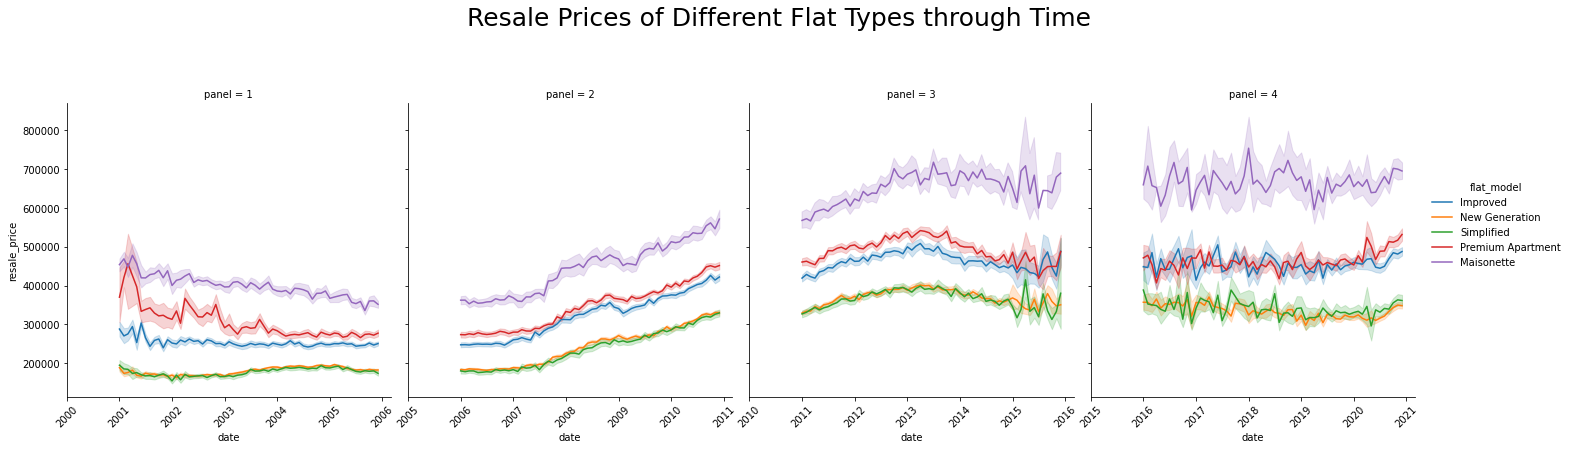

In [90]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)
g = sns.relplot(data=new_df, x = "date", y = "resale_price", hue= "flat_model", col="panel", kind="line", \
               facet_kws=dict(sharex=False))
g.set_xticklabels(rotation=45)
g.fig.suptitle("Resale Prices of Different Flat Types through Time", y=1.2, fontsize = 25)

We have compiled a file of geolocations of different towns in Singapore using publicly available [MRT stations dataset](https://www.kaggle.com/yxlee245/singapore-train-station-coordinates?select=mrt_lrt_data.csv). 

Create a heatmap of *the number of units sold* in different towns in 2021 using the latituide-longitude information from `locations.csv` file.

<div align="right"> (2 points) </div>

In [92]:
# Importing the 'locations.csv' file into a df called 'locations'
path = os.getcwd()
os.listdir("HDB")
locations = pd.read_csv(path+"/HDB/locations.csv")
locations.head()

,town,lat,lng
0,ANG MO KIO,1.37,103.85
1,BEDOK,1.32,103.93
2,BISHAN,1.35,103.85
3,BUKIT BATOK,1.35,103.75
4,BUKIT PANJANG,1.38,103.76


In [93]:
# Creating new df with 2021 data only
df_2021 = df[df["year"]==2021]

# Checking for differences in values in "town" field before merging 2 dataframes
for i in df_2021["town"].unique():
    if i not in locations["town"].unique():
        print(i)

KALLANG/WHAMPOA


In [94]:
# Since we see that the "KALLANG/WHAMPOA" is not a value in the locations df, we make the call to update it
# to "KALLANG", which is a valid value in 'locations'

df_2021["town"].replace("KALLANG/WHAMPOA", "KALLANG", inplace=True)

# Before merging, we need the counts of resales for each area
df_2021_count = df_2021.groupby("town").count().sort_values(by="resale_price", ascending = False)
df_2021_count.head()

/opt/homebrew/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,year_month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,date,year,month,panel
town,,,,,,,,,,,,,,
SENGKANG,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751
PUNGGOL,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743
TAMPINES,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150
YISHUN,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750
WOODLANDS,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638


In [95]:
# Merge the two df's
df_2021_merge = pd.merge(df_2021_count, locations, how="left", on="town")
df_2021_merge.rename(columns={"lat": "Latitude","lng":"Longtitude"},inplace=True)
df_2021_merge.head()

,town,year_month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,date,year,month,panel,Latitude,Longtitude
0,SENGKANG,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,1.39,103.90
1,PUNGGOL,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,1.41,103.90
2,TAMPINES,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,1.35,103.94
3,YISHUN,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1.43,103.84
4,WOODLANDS,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1.44,103.79


Text(0.5, 1.0, 'Number of Units Sold in 2021 by Town')

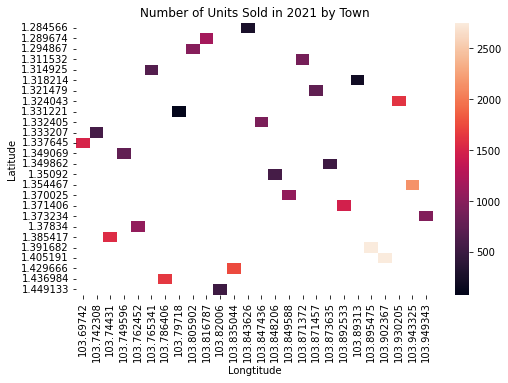

In [96]:
# Create pivot table
df_2021_merge_pivot = df_2021_merge.pivot("Latitude","Longtitude","flat_model")

# Create the seaborn heatmap based on pivoted df
plt.rcParams["figure.figsize"] = (8,5)
pd.options.display.float_format = '{:,.2f}'.format
ax = sns.heatmap(df_2021_merge_pivot)
ax.set_title("Number of Units Sold in 2021 by Town")

## Question 4: Growing Resale Prices!

In 2019, the rental cost of a 3BR HDB in Clementi used to be around 2500 dollars, and now it has reached as high as 4100. dollars. Some analysis shows that it is caused due to COVID. Well, we are not sure about that yet!

Is it true about the resale prices as well? Is there some correlation? Let's analyse the growth of various areas in Singapore.

- Create a new feature `price_per_sqm` that lists the price per square meter of the resale record.
- Compute the *average* `price_per_sqm` of houses in various areas in 2015 and 2019.
- We define *growth* as the normalised difference between the average housing `price_per_sqm` in 2015 and 2019, i.e. *(price_per_sqm_2019 - price_per_sqm_2015) / price_per_sqm_2019*. Compute `growth` of various areas in Singapore.
- Create a dataframe that contains four columns: `town`, `2015_average`, `2019_average` and `growth`. Print the dataframe sorted in descending order of the growth.



<div align="right"> (5 points) </div>

array([[<AxesSubplot:title={'center':'resale_price'}>]], dtype=object)

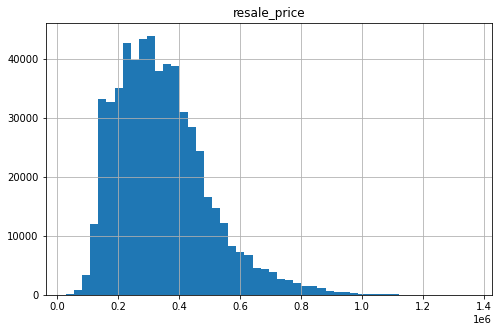

In [97]:
# Checking overall distribution of resale price over entire df
df.hist("resale_price",bins=50)

In [98]:
#Creating 2 new df's for 2015 and 2019, with only relevant fields
df_2015 = df[df["year"]==2015][["town","resale_price","floor_area_sqm"]]
df_2019 = df[df["year"]==2019][["town","resale_price","floor_area_sqm"]]

# Divide the averages to get price per sqm
df_2015["price_per_sqm_2015"] = df_2015["resale_price"]/df_2015["floor_area_sqm"]
# Groupby town, and get mean values for resale price, area, and price per sqm
df_2015 = df_2015.groupby("town").mean()

# Repeat steps for 2019 df
df_2019["price_per_sqm_2019"] = df_2019["resale_price"]/df_2019["floor_area_sqm"]
df_2019 = df_2019.groupby("town").mean()

# Merge two df's to create new df with the price per sqm fields
df_2015_2019 = pd.merge(df_2015,df_2019,on="town")
df_2015_2019 = df_2015_2019[["price_per_sqm_2015","price_per_sqm_2019"]]
df_2015_2019.rename(columns={"price_per_sqm_2015":"2015_average","price_per_sqm_2019":"2019_average"},inplace=True)

# calculate growth % with given formula
df_2015_2019["growth"] = (df_2015_2019["2019_average"] - df_2015_2019["2015_average"])/df_2015_2019["2019_average"]
df_2015_2019.sort_values(by="growth",ascending=False)


,2015_average,2019_average,growth
town,,,
PUNGGOL,"4,353.69","4,874.92",0.11
BUKIT PANJANG,"3,941.68","4,192.61",0.06
PASIR RIS,"3,893.74","4,119.54",0.05
TAMPINES,"4,382.01","4,578.14",0.04
SENGKANG,"4,400.66","4,556.96",0.03
BISHAN,"5,609.32","5,783.51",0.03
KALLANG/WHAMPOA,"5,610.72","5,676.95",0.01
YISHUN,"3,965.66","3,983.78",0.00
QUEENSTOWN,"6,440.40","6,456.63",0.00


We observe that most of the areas have seen a decline in the average resale price, except a few areas. Bukit Timah is considered to be one of the rich neighbourhoods with a large number of landed properties in Singapore. It seems that there has not been any growth in that area. Is this a chance observation or real?


Which statistical test would you use to validate such a hypothesis?
<div align="right"> (1 point) </div>

We can perform a two-tailed t-test to check if there is any significant differences between the two samples. The null hypothesis is the two independent samples have identical average (expected) values.

$H_0 : \bar{x_1}= 6,410$
(Resale prices of Bukit Timah HDB flats in 2019 are the same as in 2015 (~6,410))

$H_1 : \bar{x_1} \neq 6,410$
(Resale prices of Bukit Timah HDB flats in 2019 are not the same as in 2015 (~6,410))

\begin{equation}
t = {\frac{\bar{x_1} - \bar{x_2}}{\sqrt{(S^2(\frac{1}{n_1} + \frac{1}{n_2}))}}}
\end{equation}

Conduct the test and print the p-value. What is the inference? Has the average resale price in Bukit Timah really not changed from 2015 to 2019?
<div align="right"> (2 points) </div>

In [99]:
from scipy import stats

df_2015_BT = df[(df["year"]==2015)][["town","resale_price","floor_area_sqm","year"]]
df_2015_BT = df_2015_BT[df_2015_BT["town"]=="BUKIT TIMAH"]
df_2019_BT = df[(df["year"]==2019)][["town","resale_price","floor_area_sqm","year"]]
df_2019_BT = df_2019_BT[df_2019_BT["town"]=="BUKIT TIMAH"] 

stats.ttest_ind(df_2015_BT["resale_price"], df_2019_BT["resale_price"])

Ttest_indResult(statistic=0.2255884929218116, pvalue=0.8219684970658696)

As the p-value is 0.82 >0.05, we can **not** reject the null hypothesis that the resale prices are the same from 2015 and 2019 in Bukit Timah. 

In other words, we can be confident that the resale prices in Bukit Timah have remained the same in 2019 as in 2015.

Our growth analysis from 2015 to 2019 is counter-intuitive to the skyrocketted rental prices in the last few months. Is COVID a reason for this bloated market? 

Redo the analysis for year 2020 to 2021. Print the sorted list ares according to the growth from 2020 to 2021.

In [100]:
#Method 1: Calculating Price Per Square Meter First
df_2020 = df[df["year"]==2020][["town","resale_price","floor_area_sqm"]]
df_2021 = df[df["year"]==2021][["town","resale_price","floor_area_sqm"]]

# Divide the averages to get price per sqm
df_2020["price_per_sqm_2020"] = df_2020["resale_price"]/df_2020["floor_area_sqm"]
# Groupby town, and get mean values for resale price, area, and price per sqm
df_2020 = df_2020.groupby("town").mean()

# Repeat for 2021 df
df_2021["price_per_sqm_2021"] = df_2021["resale_price"]/df_2021["floor_area_sqm"]
df_2021 = df_2021.groupby("town").mean()

# Merge two df's to create new df with the price per sqm fields
df_2020_2021 = pd.merge(df_2020,df_2021,on="town")
df_2020_2021 = df_2020_2021[["price_per_sqm_2020","price_per_sqm_2021"]]
df_2020_2021.rename(columns={"price_per_sqm_2020":"2020_average","price_per_sqm_2021":"2021_average"},inplace=True)

# calculate growth % with given formula
df_2020_2021["growth"] = (df_2020_2021["2021_average"] - df_2020_2021["2020_average"])/df_2020_2021["2021_average"]
df_2020_2021.sort_values(by="growth",ascending=False)

,2020_average,2021_average,growth
town,,,
CHOA CHU KANG,"3,815.45","4,639.64",0.18
BUKIT BATOK,"3,964.54","4,693.71",0.16
WOODLANDS,"3,701.46","4,324.35",0.14
SEMBAWANG,"3,859.01","4,461.18",0.13
CENTRAL AREA,"7,174.41","8,253.50",0.13
KALLANG/WHAMPOA,"5,388.57","6,193.89",0.13
TOA PAYOH,"5,015.88","5,761.86",0.13
YISHUN,"4,095.64","4,688.37",0.13
JURONG EAST,"4,204.20","4,780.21",0.12


Name the top-3 areas that have seen the maximum growth in the resale prices per square meters from 2020 to 2021.
<div align="right"> (1 point) </div>

**1. CHOA CHU KANG**

**2. BUKIT BATOK**

**3. WOODLANDS**

Do you think COVID is a valid justification for the hike in the resale prices in this area? Please provide your qualitative judgment in 2-3 lines.

<div align="right"> (1 point) </div>

Yes because during COVID, most people are forced to work from home, which meant the need to live in central areas decreased dramatically since workers no longer need to be physically at the office during work days.

The value and demand for flats in the outskirts / heartland of Singapore rose dramatically as a consequence of this shift in behavior.

Moreover, although this largely explains for the price of land across Singapore, we still saw a sharp increase in the Central Area (ranked at #4). A possible explanation can simply be due to increased savings of the average household in Singapore, which has led to higher overall ability and propensity to spend on land investments, which has driven up demand and prices of HDB flats in general. 

However, this may also be explained by a variety of other reasons that may not be particularly obvious just from this dataset.